<a href="https://colab.research.google.com/github/beatrizleite/IA-Proj/blob/main/tema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas matplotlib seaborn scikit-learn tabulate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tabulate import tabulate


In [ ]:
# URLs dos arquivos CSV
urls = [
    'https://raw.githubusercontent.com/jotaSVV/AirmonSystem-Datasets/main/dataset_106.csv',
    'https://raw.githubusercontent.com/jotaSVV/AirmonSystem-Datasets/main/dataset_204.csv',
    'https://raw.githubusercontent.com/jotaSVV/AirmonSystem-Datasets/main/dataset_210.csv',
    'https://raw.githubusercontent.com/jotaSVV/AirmonSystem-Datasets/main/Alpendorada/Alpendorada%20Dataset.csv'
]


dfs = {}

for url in urls:
    response = requests.get(url)

    # verificar se o pedido teve resposta positiva
    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))

        # formatação do nome do ficheiro
        filename = url.split('/')[-1].replace('%20', ' ')
        dfs[filename] = df

        print(f"\nExemplo do arquivo {filename}:")
        print(df.head())
    else:
        print(f"Falha ao fazer download do ficheiro {url}")

# Verificar os DataFrames carregados
print("\nDataFrames carregados:")
for key in dfs:
    print(key)



Exemplo do arquivo dataset_106.csv:
                  Time  classroom  door_closed_on_arrival  \
0  2023-03-23 17:30:00      106.0                     NaN   
1  2023-03-23 17:35:00      106.0                     NaN   
2  2023-03-23 17:40:00      106.0                     NaN   
3  2023-03-23 17:45:00      106.0                     NaN   
4  2023-03-23 17:50:00      106.0                     NaN   

   windows_closed_on_arrival  persons_in_classroom  \
0                        NaN                   0.0   
1                        NaN                   0.0   
2                        NaN                   0.0   
3                        NaN                   0.0   
4                        NaN                   0.0   

   opened_windows_end_of_class  ac_on_during_class  during_class_door_state  \
0                          NaN                 NaN                      NaN   
1                          NaN                 NaN                      NaN   
2                          NaN    

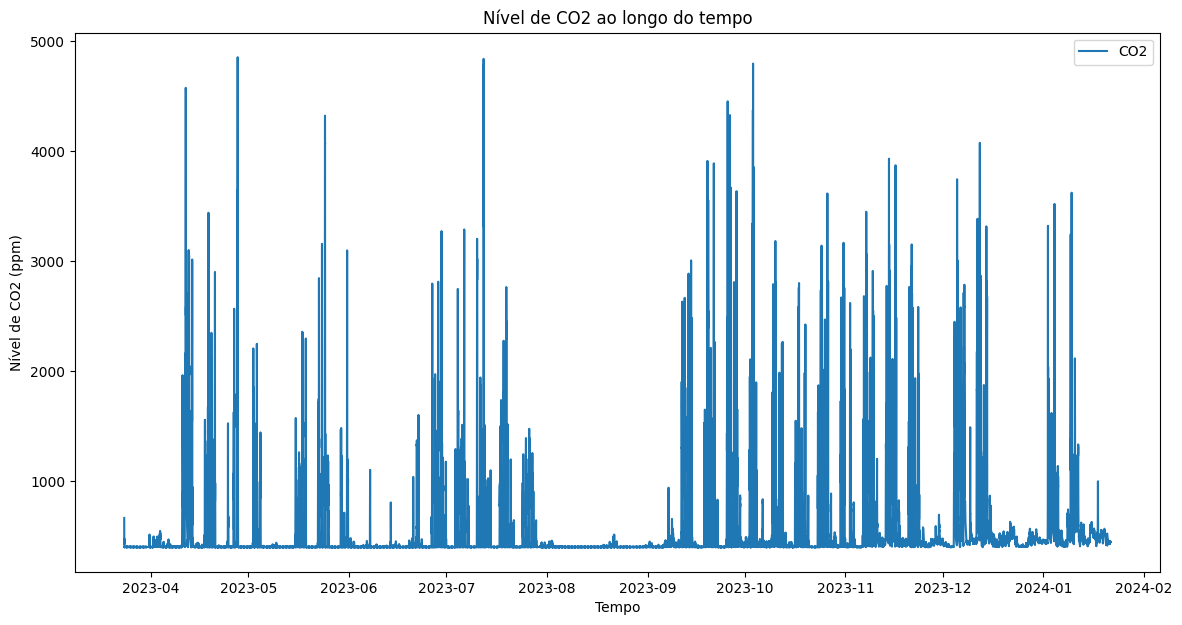

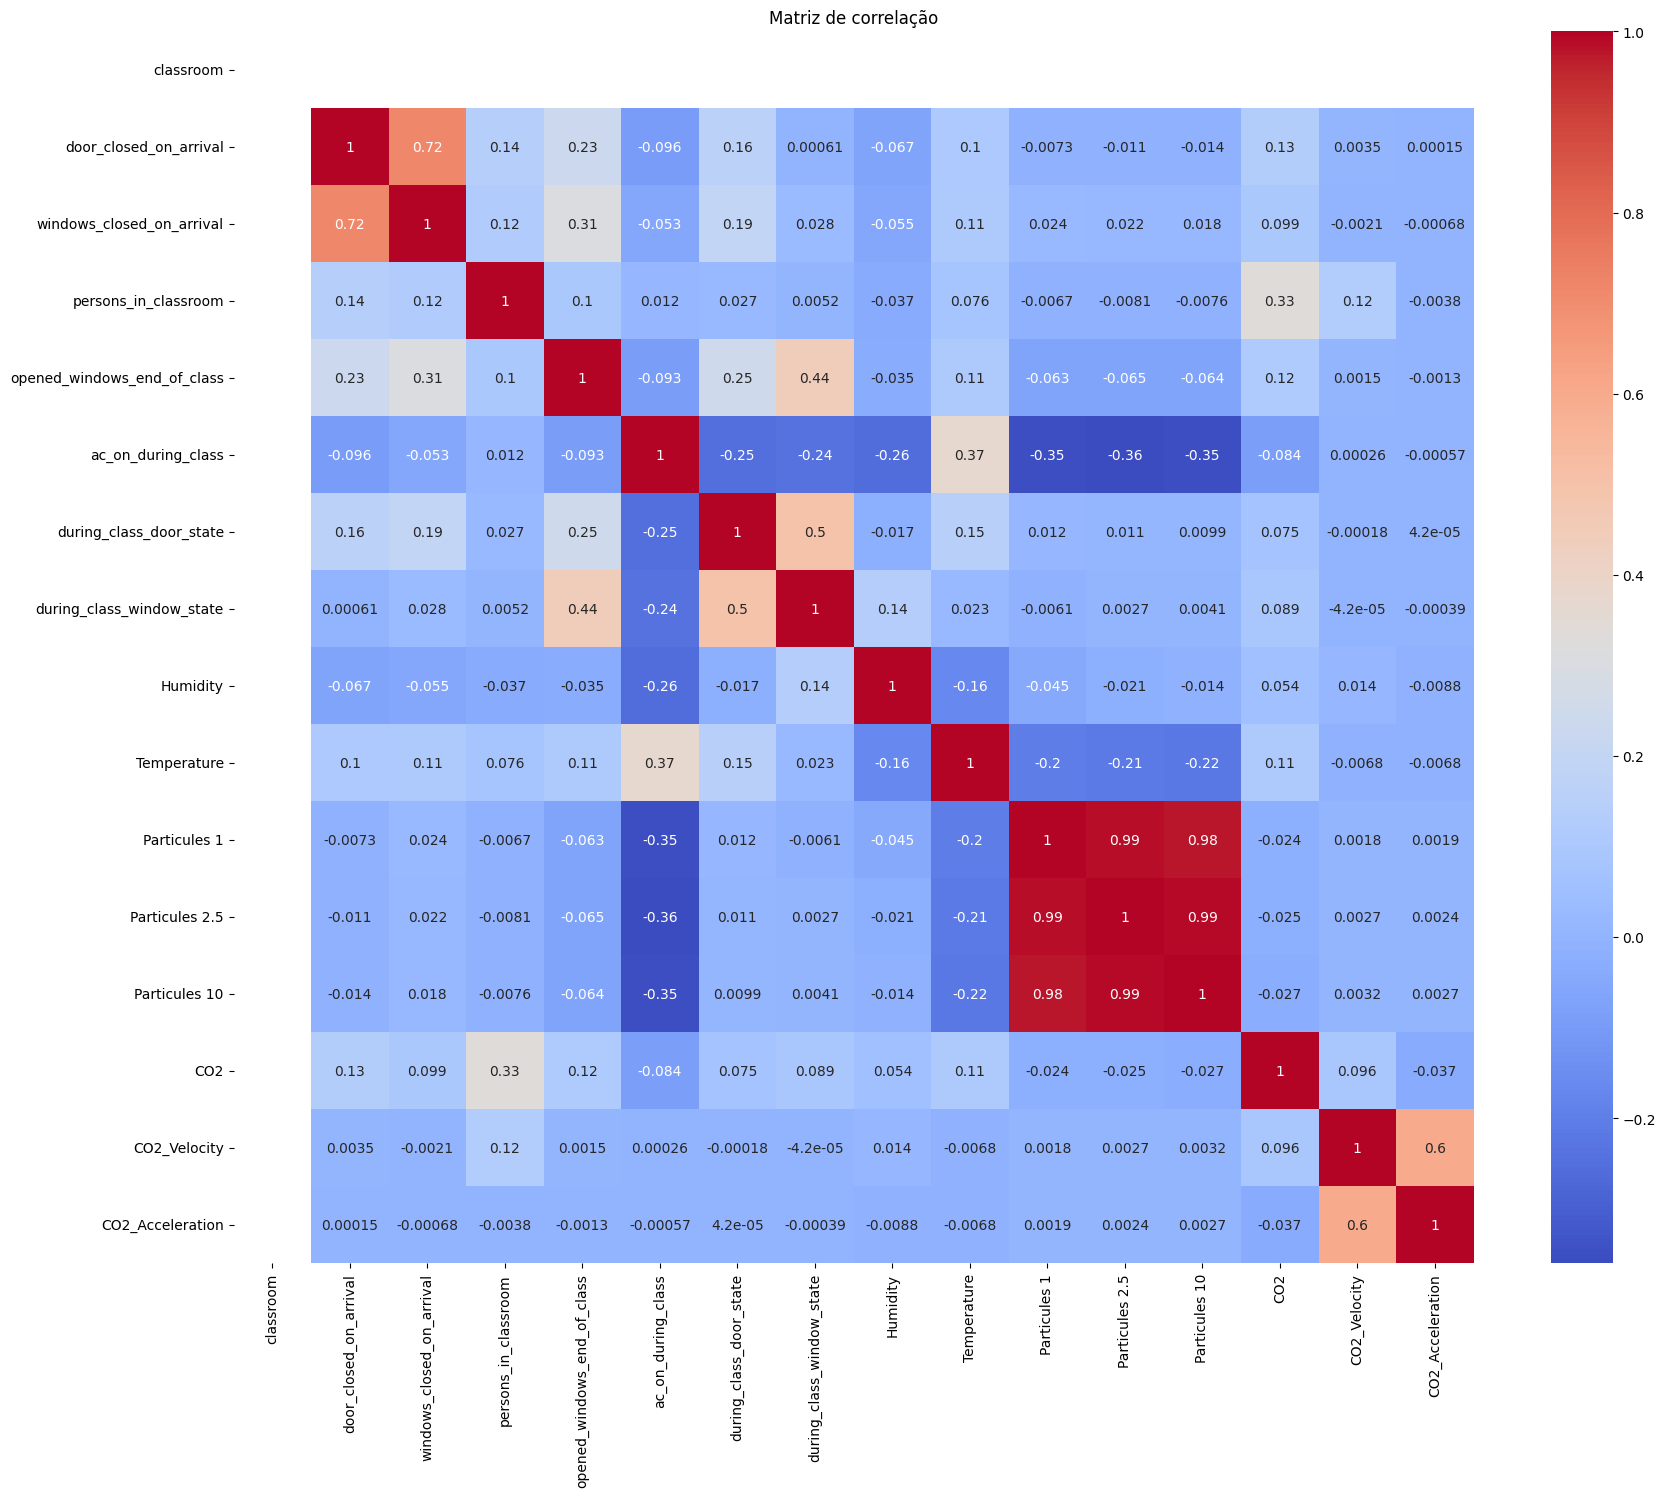

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de visualização para o CO2
df_co2 = dfs['dataset_106.csv']
df_co2['Time'] = pd.to_datetime(df_co2['Time'])

plt.figure(figsize=(14, 7))
plt.plot(df_co2['Time'], df_co2['CO2'], label='CO2')
plt.xlabel('Tempo')
plt.ylabel('Nível de CO2 (ppm)')
plt.title('Nível de CO2 ao longo do tempo')
plt.legend()
plt.show()

# Limpeza dos dados para a correlação
# Selecionar apenas as colunas numéricas
df_numeric = df_co2.select_dtypes(include=['float64', 'int64'])

# Análise das correlações
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

In [ ]:
# selecionar os dados para testar o modelo
X = df_numeric[['CO2', 'Temperature', 'Humidity']]
if 'persons_in_classroom' in df_co2.columns:
    y = df_co2['persons_in_classroom']
else:
    y = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

    # Plot predictions
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.values, label='Actual Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.xlabel('Sample')
    plt.ylabel('Occupancy')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()


## Training and evaluating Linear Regression...
Model: LinearRegression
  Mean Absolute Error (MAE): 0.6134
  R² Score: 0.1312


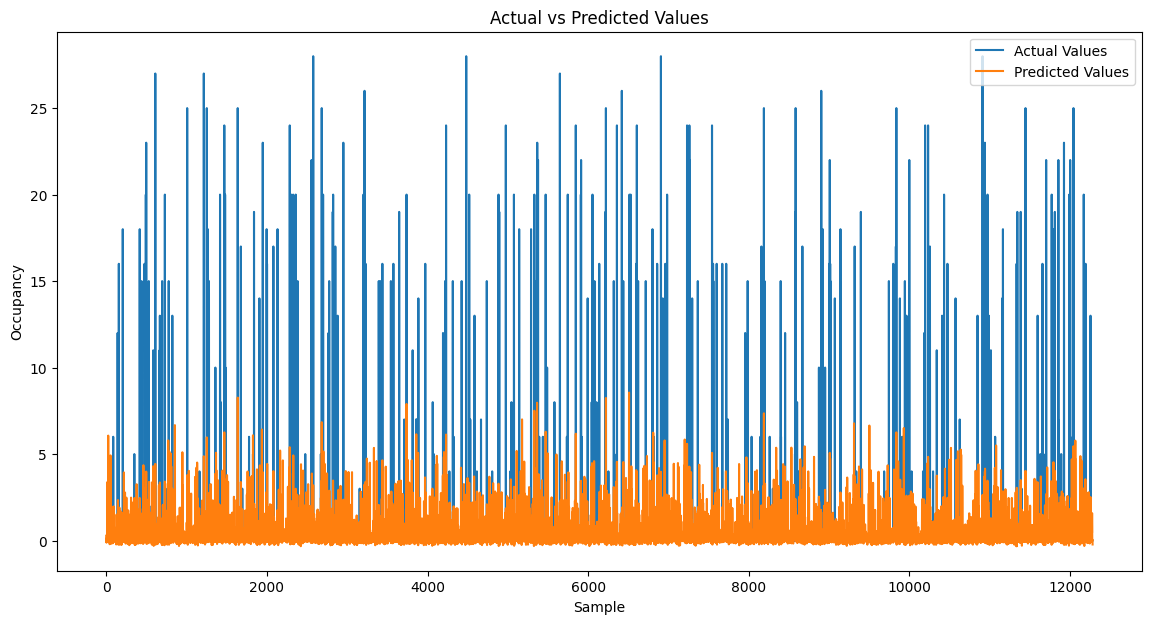





## Training and evaluating Random Forest...
Model: RandomForestRegressor
  Mean Absolute Error (MAE): 0.3907
  R² Score: 0.4079


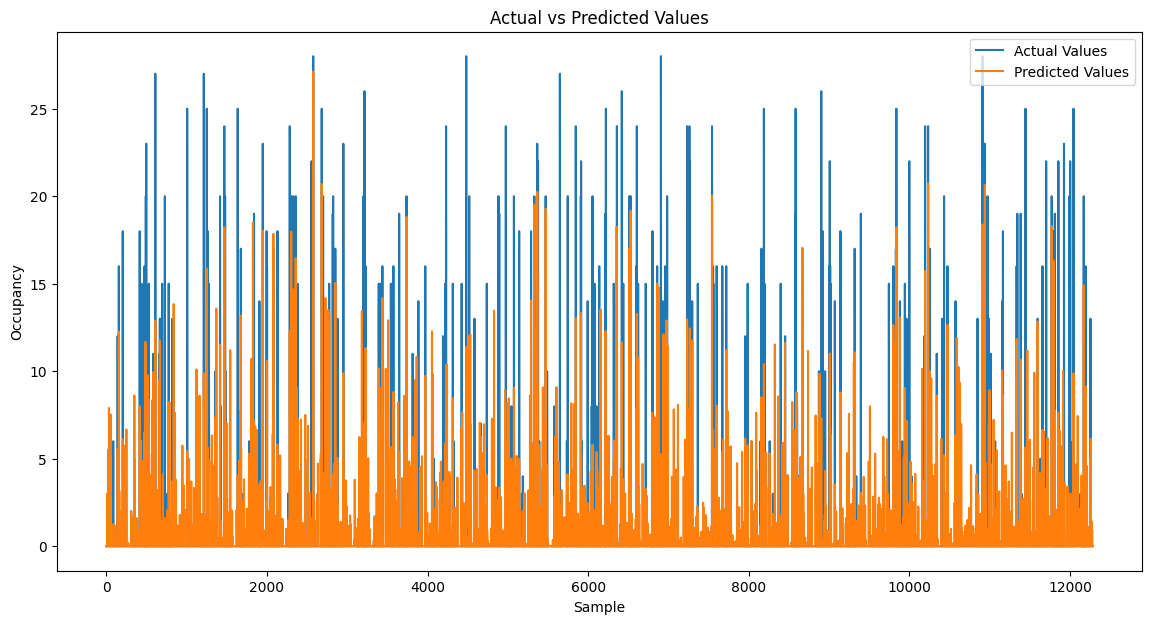





## Training and evaluating Gradient Boosting...
Model: GradientBoostingRegressor
  Mean Absolute Error (MAE): 0.5248
  R² Score: 0.2260


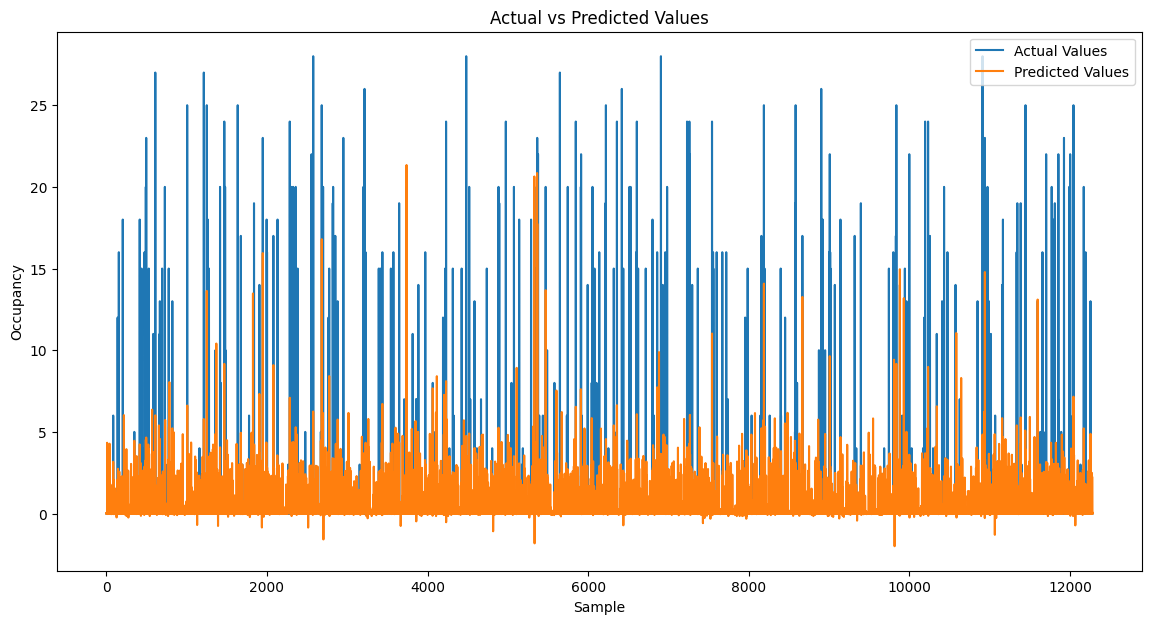





## Training and evaluating SVR...
Model: SVR
  Mean Absolute Error (MAE): 0.4187
  R² Score: -0.0089


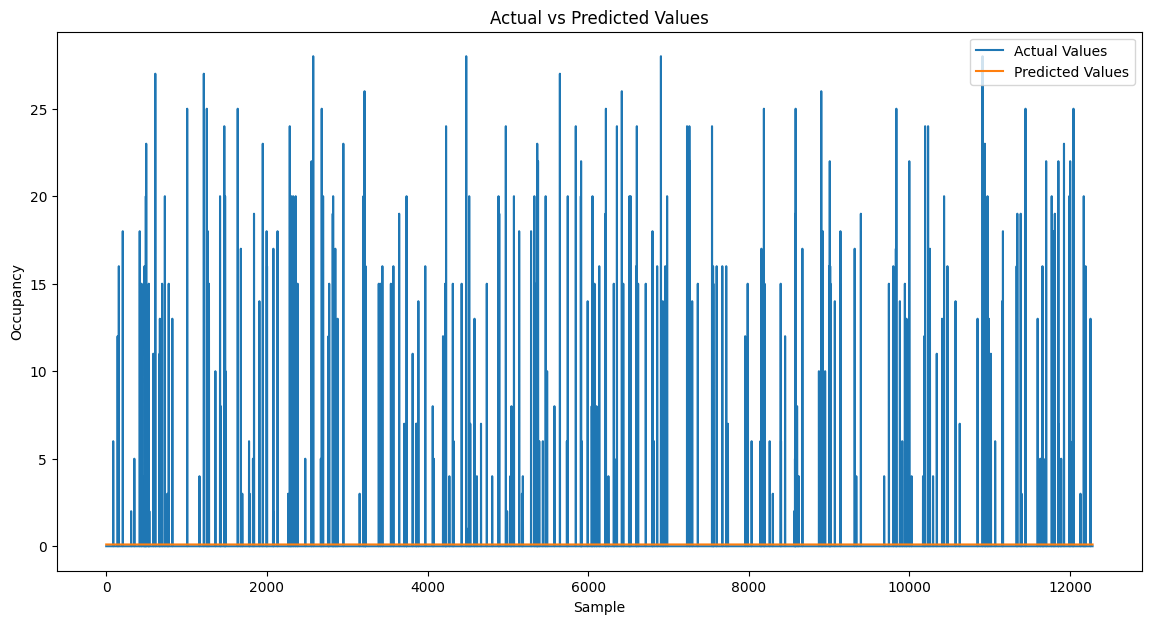





## Training and evaluating K-Nearest Neighbors...
Model: KNeighborsRegressor
  Mean Absolute Error (MAE): 0.5188
  R² Score: 0.0133


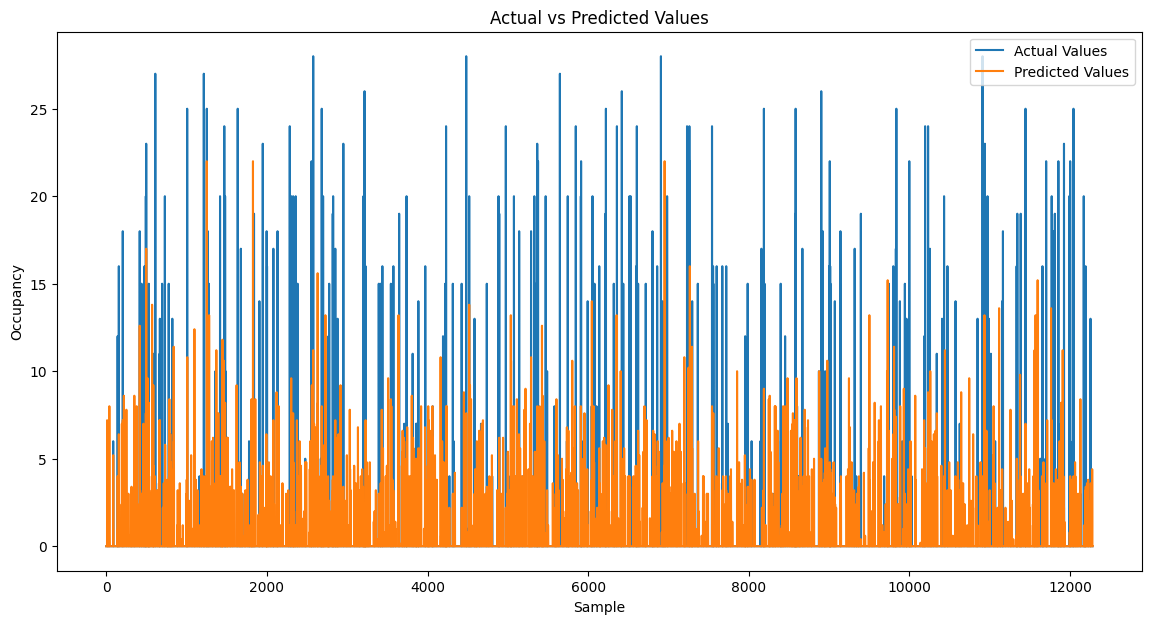

In [ ]:
# Definir uma lista de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Treinar e avaliar cada modelo
results = {}
for model_name, model in models.items():
    print(f"## Training and evaluating {model_name}...")
    evaluate_model(model, X_train, X_test, y_train, y_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'R^2': r2}
    print('\n\n\n')

In [ ]:
df_results = pd.DataFrame(results).T
df_results.index.name = 'Model'
print(tabulate(df_results, headers='keys', tablefmt='github', floatfmt=".4f"))

| Model               |    MAE |     R^2 |
|---------------------|--------|---------|
| Linear Regression   | 0.6134 |  0.1312 |
| Random Forest       | 0.3907 |  0.4079 |
| Gradient Boosting   | 0.5248 |  0.2260 |
| SVR                 | 0.4187 | -0.0089 |
| K-Nearest Neighbors | 0.5188 |  0.0133 |


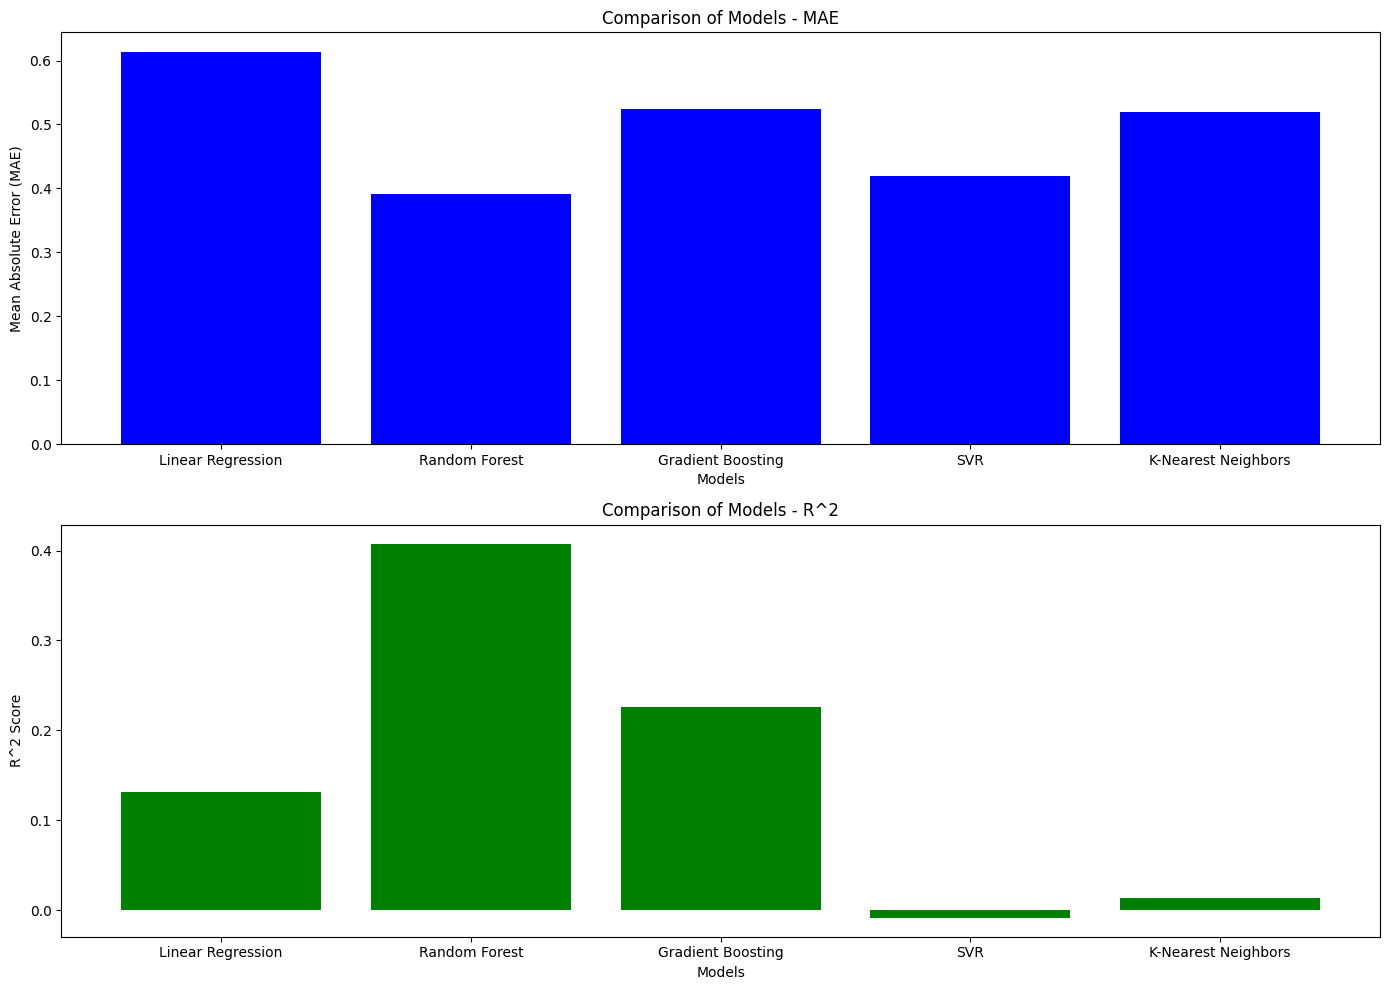

In [ ]:
# Plotting comparison charts
plt.figure(figsize=(14, 10))

# Plotting MAE
plt.subplot(2, 1, 1)
mae_values = [result['MAE'] for result in results.values()]
plt.bar(list(results.keys()), mae_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Models - MAE')

# Plotting R^2
plt.subplot(2, 1, 2)
r2_values = [result['R^2'] for result in results.values()]
plt.bar(list(results.keys()), r2_values, color='green')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('Comparison of Models - R^2')

plt.tight_layout()
plt.show()
